In [17]:
from plotter import get_data
data = get_data()

In [18]:
#A 2d array of percentage increase in profit
import numpy
deltaP = numpy.zeros((len(data['GAMMA_ARRAY']),len(data['COEFF_ARRAY_INTERNAL_COINS'])))
for x,v in enumerate(data['GAMMA_ARRAY']):
    deltaP[x,] = data['profit_by_gamma'][x]['median']
#print deltaP
# # a second way of doing the same
# deltaP1 = numpy.zeros((len(data['GAMMA_ARRAY']),len(data['COEFF_ARRAY_INTERNAL_COINS']))).T
# for x,v in enumerate(data['COEFF_ARRAY_INTERNAL_COINS']):
#     deltaP1[x,] = data['profit_by_prob'][x]['median']
# print deltaP1.T

In [19]:
#A 2d array of percentage increase in people/marketshare
import numpy
deltaN = numpy.zeros((len(data['GAMMA_ARRAY']),len(data['COEFF_ARRAY_INTERNAL_COINS'])))
for x,v in enumerate(data['GAMMA_ARRAY']):
    deltaN[x,] = data['people_by_gamma'][x]['median']
#print deltaN

In [23]:
lb_vector = [0,0.05,.1,0.15,.2]
MAX_DELTA_N = 100
min_market_share_by_profit_lb = numpy.zeros((len(lb_vector),len(data['GAMMA_ARRAY'])))
for w,lb in enumerate(lb_vector):
    for x,v1 in enumerate(data['GAMMA_ARRAY']):
        min_deltaN = MAX_DELTA_N
        for y,v2 in enumerate(data['COEFF_ARRAY_INTERNAL_COINS']):
            if deltaP[x,y] >= lb:
                min_deltaN = min(min_deltaN,deltaN[x,y])
        min_market_share_by_profit_lb[w,x] = min_deltaN
#print min_market_share_by_profit_lb

In [24]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


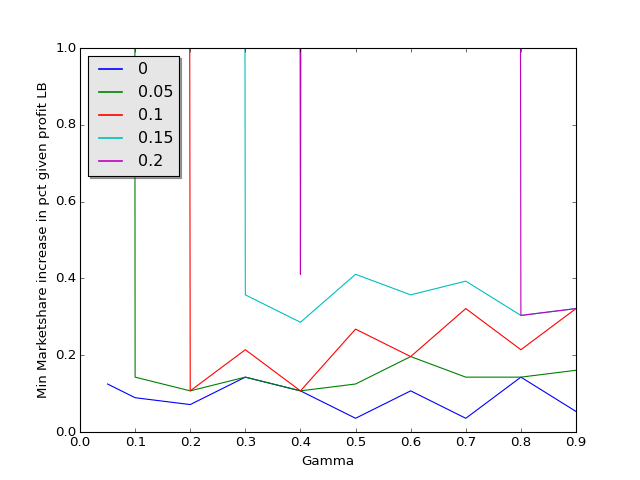

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

for lb_idx,lb in enumerate(lb_vector):
    xs 		= data['GAMMA_ARRAY']
    ys 		= min_market_share_by_profit_lb[lb_idx,]
    ax.plot(xs, ys,label=lb)

legend = ax.legend(loc='best', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width

plt.xlabel('Gamma')
plt.ylabel('Min Marketshare increase in pct given profit LB')
plt.ylim(0,1)
plt.show()	